Original code by **Raghavender Ganesh**.   

## Implementing Data Mining on Non Clinical Data
Non clinical data inludes factors like diet, smoking, physical activity, etc.

#### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Dataframe with Sample Data

In [2]:
data={
    "Age":np.random.randint(20,80,100),
    "BMI":np.random.randint(18,35,100),
    "Smoking":np.random.randint(0,2,100),
    "Alchohol_Consumption":np.random.randint(0,4,100),
    "Physical_Activity":np.random.randint(0,4,100),
    "Chronic_Disease":np.random.randint(0,2,100)
}

df = pd.DataFrame(data)

df.head()

,Age,BMI,Smoking,Alchohol_Consumption,Physical_Activity,Chronic_Disease
0,35,20,1,0,2,1
1,37,23,1,0,1,0
2,73,33,0,2,0,0
3,30,28,1,2,0,1
4,43,24,1,3,2,0


### Scaling

In [3]:
features=['Age','BMI','Smoking','Alchohol_Consumption','Physical_Activity','Chronic_Disease']

scaler=StandardScaler()
df[features]=scaler.fit_transform(df[features])

### Pairplot

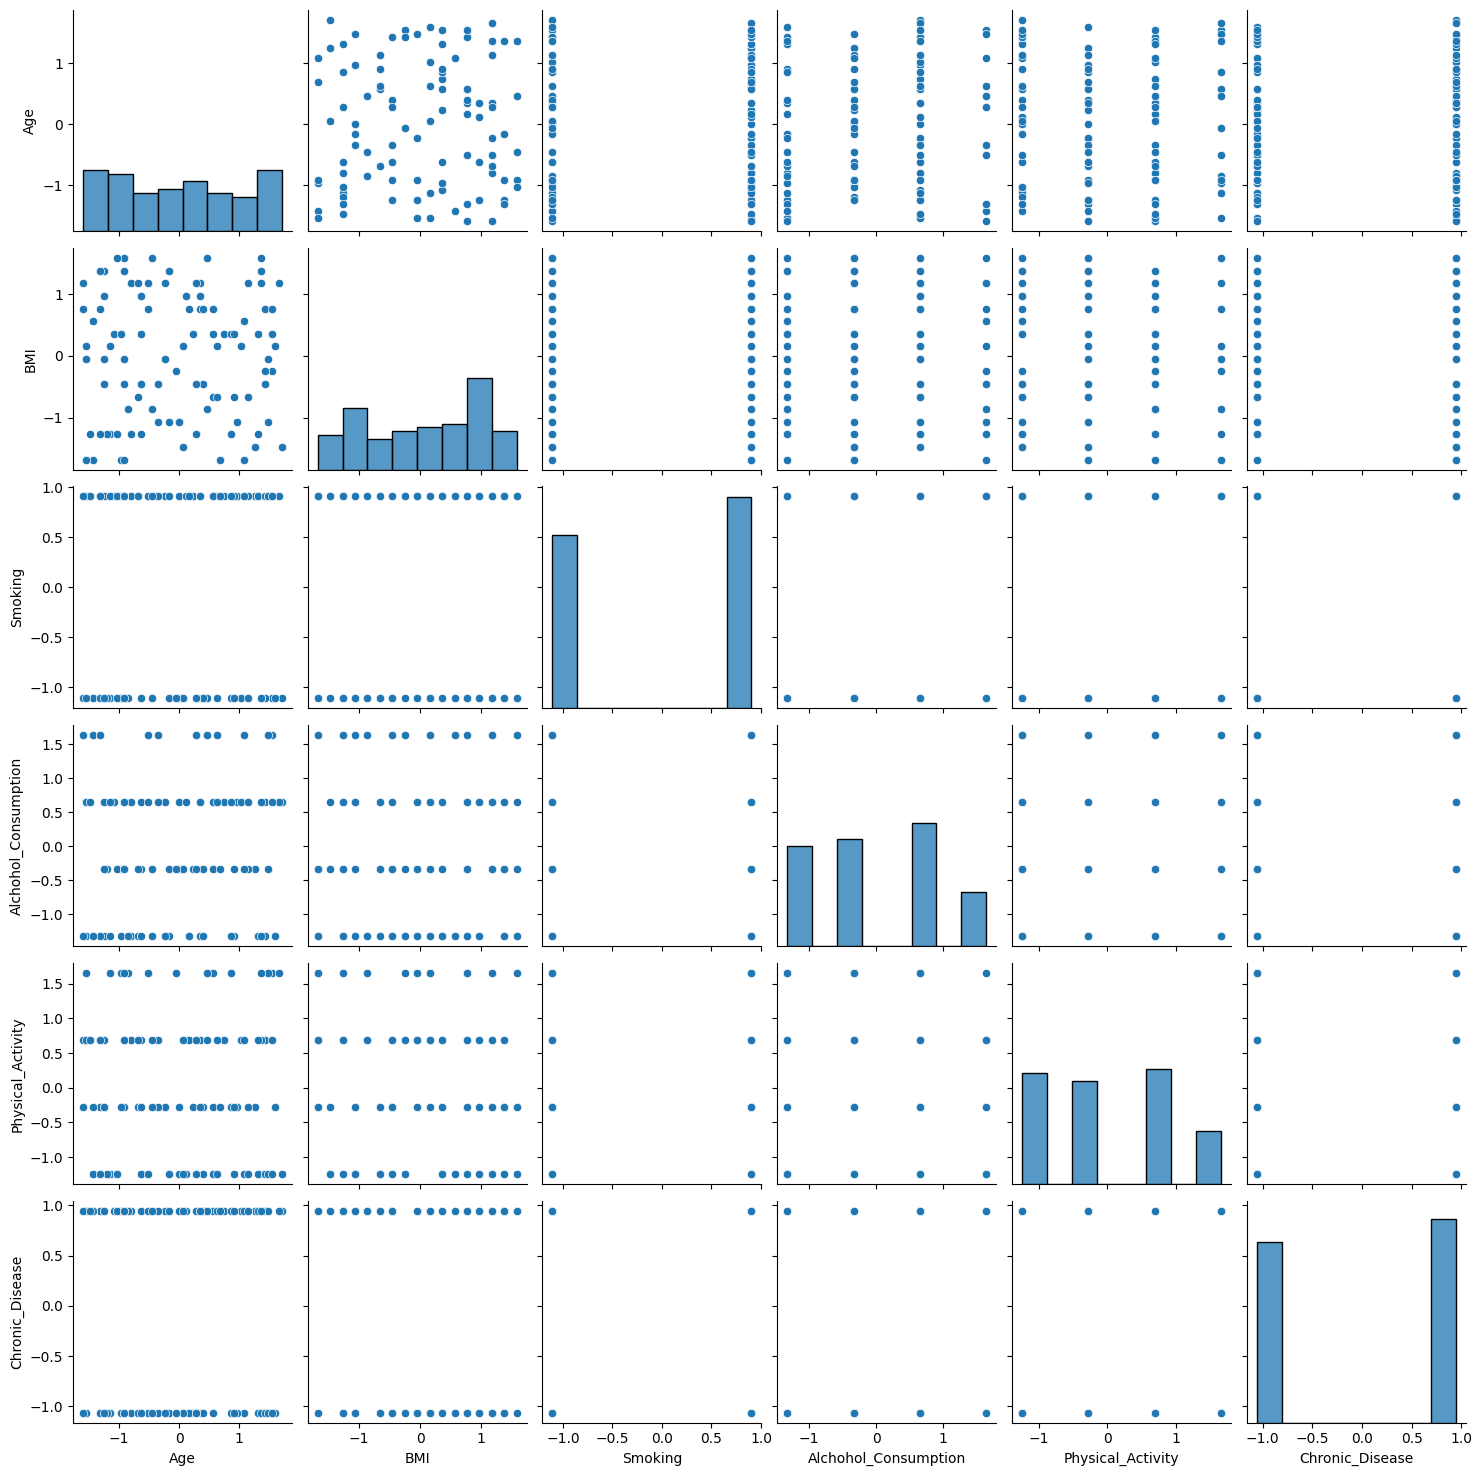

In [4]:
sns.pairplot(df)


### Correlation Matrix

<Axes: >

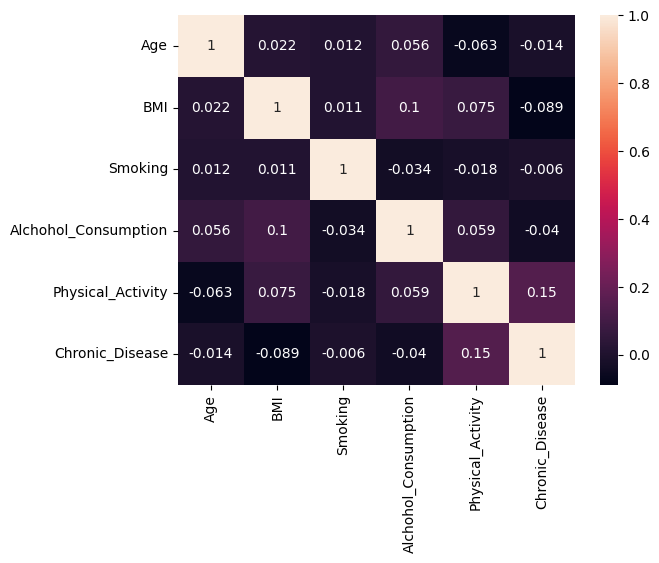

In [5]:
corr = df.corr()
sns.heatmap(corr,annot=True)

### PCA

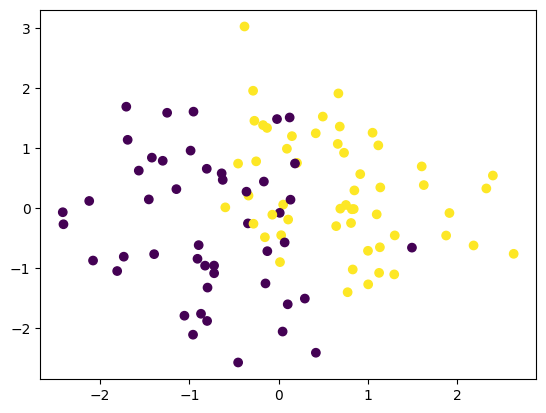

In [7]:
pca = PCA(n_components=2)

# Apply PCA on features
pca_data = pca.fit_transform(df[features])
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# This is for label
pca_df['Chronic_Disease'] = df['Chronic_Disease']

plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Chronic_Disease'])


### K-Means Clustering

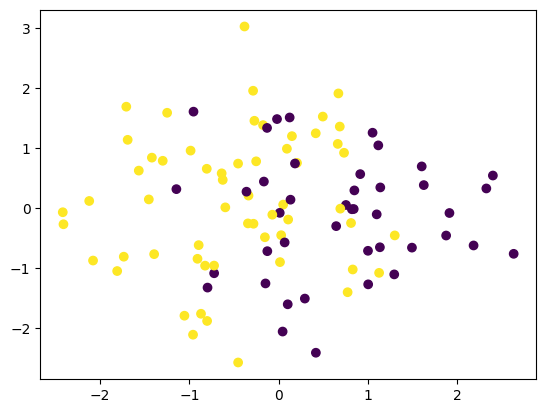

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=0)

df['Clusters'] = kmeans.fit_predict(df[features])
pca_df['Clusters'] = df['Clusters']

# Output
plt.scatter(
    pca_df['PCA1'], pca_df['PCA2'], c = pca_df['Clusters']
    )